In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import sys
sys.path.append('/Python_ML_lib_classification/Course_project/dev/')
import ml_helper as mlhp

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
import warnings
warnings.simplefilter('ignore')

## Обзор данных

### Описание датасета

    Home Ownership - домовладение
    Annual Income - годовой доход
    Years in current job - количество лет на текущем месте работы
    Tax Liens - налоговые обременения
    Number of Open Accounts - количество открытых счетов
    Years of Credit History - количество лет кредитной истории
    Maximum Open Credit - наибольший открытый кредит
    Number of Credit Problems - количество проблем с кредитом
    Months since last delinquent - количество месяцев с последней просрочки платежа
    Bankruptcies - банкротства
    Purpose - цель кредита
    Term - срок кредита
    Current Loan Amount - текущая сумма кредита
    Current Credit Balance - текущий кредитный баланс
    Monthly Debt - ежемесячный долг
    Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)



### Настраиваем константы и загружаем данные


In [3]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'
TARGET = 'Credit Default'

df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

### Анализируем обучающий данные

In [4]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,"482,087.00",NaN,0.00,11.00,26.30,"685,960.00",1.00,nan,1.00,debt consolidation,Short Term,"99,999,999.00","47,386.00","7,914.00",749.00,0
1,Own Home,"1,025,487.00",10+ years,0.00,15.00,15.30,"1,181,730.00",0.00,nan,0.00,debt consolidation,Long Term,"264,968.00","394,972.00","18,373.00",737.00,1
2,Home Mortgage,"751,412.00",8 years,0.00,11.00,35.00,"1,182,434.00",0.00,nan,0.00,debt consolidation,Short Term,"99,999,999.00","308,389.00","13,651.00",742.00,0
3,Own Home,"805,068.00",6 years,0.00,8.00,22.50,"147,400.00",1.00,nan,1.00,debt consolidation,Short Term,"121,396.00","95,855.00","11,338.00",694.00,0
4,Rent,"776,264.00",8 years,0.00,13.00,13.60,"385,836.00",1.00,nan,0.00,debt consolidation,Short Term,"125,840.00","93,309.00","7,180.00",719.00,0


In [5]:
df_train[TARGET].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [6]:
df_train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.00,0.07,0.19,0.19,0.06,-0.02,-0.10,-0.07,0.03,0.39,0.58,-0.04,-0.10
Tax Liens,0.07,1.00,-0.01,0.01,-0.00,0.60,0.05,0.06,-0.01,-0.01,0.03,0.01,0.02
Number of Open Accounts,0.19,-0.01,1.00,0.14,0.02,-0.02,-0.03,-0.02,0.00,0.27,0.41,0.02,0.03
Years of Credit History,0.19,0.01,0.14,1.00,0.03,0.07,-0.02,0.09,0.01,0.22,0.19,-0.02,-0.02
Maximum Open Credit,0.06,-0.00,0.02,0.03,1.00,-0.00,-0.00,-0.01,-0.00,0.09,0.01,-0.01,-0.01
Number of Credit Problems,-0.02,0.60,-0.02,0.07,-0.00,1.00,0.14,0.73,-0.01,-0.12,-0.04,-0.02,0.02
Months since last delinquent,-0.10,0.05,-0.03,-0.02,-0.00,0.14,1.00,0.16,0.00,-0.03,-0.06,-0.00,0.00
Bankruptcies,-0.07,0.06,-0.02,0.09,-0.01,0.73,0.16,1.00,-0.01,-0.14,-0.08,-0.03,0.00
Current Loan Amount,0.03,-0.01,0.00,0.01,-0.00,-0.01,0.00,-0.01,1.00,0.02,-0.01,-0.11,-0.23
Current Credit Balance,0.39,-0.01,0.27,0.22,0.09,-0.12,-0.03,-0.14,0.02,1.00,0.50,-0.01,-0.02


In [7]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,"5,943.00","7,500.00","7,500.00","7,500.00","7,500.00","7,500.00","3,419.00","7,486.00","7,500.00","7,500.00","7,500.00","5,943.00","7,500.00"
mean,"1,366,391.72",0.03,11.13,18.32,"945,153.73",0.17,34.69,0.12,"11,873,177.45","289,833.24","18,314.45","1,151.09",0.28
std,"845,339.20",0.27,4.91,7.04,"16,026,216.67",0.50,21.69,0.35,"31,926,122.97","317,871.38","11,926.76","1,604.45",0.45
min,"164,597.00",0.00,2.00,4.00,0.00,0.00,0.00,0.00,"11,242.00",0.00,0.00,585.00,0.00
25%,"844,341.00",0.00,8.00,13.50,"279,229.50",0.00,16.00,0.00,"180,169.00","114,256.50","10,067.50",711.00,0.00
50%,"1,168,386.00",0.00,10.00,17.00,"478,159.00",0.00,32.00,0.00,"309,573.00","209,323.00","16,076.50",731.00,0.00
75%,"1,640,137.00",0.00,14.00,21.80,"793,501.50",0.00,50.00,0.00,"519,882.00","360,406.25","23,818.00",743.00,1.00
max,"10,149,344.00",7.00,43.00,57.70,"1,304,726,170.00",7.00,118.00,4.00,"99,999,999.00","6,506,797.00","136,679.00","7,510.00",1.00


In [8]:
mlhp.get_object_value_counts(df_train)

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [10]:
mlhp.get_nan_percent(df_train)

Home Ownership                  0.00
Annual Income                  20.76
Years in current job            4.95
Tax Liens                       0.00
Number of Open Accounts         0.00
Years of Credit History         0.00
Maximum Open Credit             0.00
Number of Credit Problems       0.00
Months since last delinquent   54.41
Bankruptcies                    0.19
Purpose                         0.00
Term                            0.00
Current Loan Amount             0.00
Current Credit Balance          0.00
Monthly Debt                    0.00
Credit Score                   20.76
Credit Default                  0.00
dtype: float64


### После анализа видим:
По таблице корриляции видим зависимости целевой переменной с: 
- Credit Score 0.44
- Current Loan Amount -0.23
- Annual Income - 0.10

Присутствуют пропущеные данные по:
- Annual Income
- Years in current job
- Months since last delinquent 
- Bankruptcies
- Credit Score

## Проанализируем тестовый датасет

In [11]:
mlhp.get_nan_percent(df_test)

Home Ownership                  0.00
Annual Income                  20.52
Years in current job            3.44
Tax Liens                       0.00
Number of Open Accounts         0.00
Years of Credit History         0.00
Maximum Open Credit             0.00
Number of Credit Problems       0.00
Months since last delinquent   54.32
Bankruptcies                    0.12
Purpose                         0.00
Term                            0.00
Current Loan Amount             0.00
Current Credit Balance          0.00
Monthly Debt                    0.00
Credit Score                   20.52
dtype: float64


### Построение новых признаков

In [12]:
# mlhp.add_id(df_train)
# mlhp.add_id(df_test)

In [13]:
def home_ownership_convert(df: pd.DataFrame):
    df['Home Ownership'] = df['Home Ownership'].map({'Home Mortgage':'1','Rent':'2','Own Home':'3','Have Mortgage':'4'}).astype(int)
        #.astype('category')


In [14]:
def years_in_current_job_convert(df: pd.DataFrame):
    df['Years in current job'] = df['Years in current job'].map({
        '10+ years':'1', 
        '2 years':'2', 
        '3 years':'3', 
        '< 1 year':'4', 
        '5 years':'5', 
        '1 year':'6', 
        '4 years':'7', 
        '6 years':'8', 
        '7 years':'9', 
        '8 years':'10', 
        '9 years':'11' 
    }).astype(int)
        # .astype('category')


In [15]:
def purpose_convert(df: pd.DataFrame):
    df['Purpose'] = df['Purpose'].map({
        'debt consolidation':'1', 
        'other':'2', 
        'home improvements':'3', 
        'business loan':'4', 
        'buy a car':'5', 
        'medical bills':'6', 
        'major purchase':'7', 
        'take a trip':'8', 
        'buy house':'9', 
        'small business':'10', 
        'wedding':'11', 
        'moving':'12', 
        'educational expenses':'13', 
        'vacation':'14', 
        'renewable energy':'15' 
    }).astype(int)

In [16]:
def term_convert(df: pd.DataFrame):
    df['Term'] = df['Term'].map({
        'Short Term':'1', 
        'Long Term':'2'
    }).astype(int)

In [17]:
mlhp.fillna_dummines_mode(df_train) 
mlhp.fillna_dummines_mode(df_test)

In [18]:
# Home Ownership
home_ownership_convert(df_train)
home_ownership_convert(df_test)


In [19]:
# Years in current job
years_in_current_job_convert(df_train)
years_in_current_job_convert(df_test)

In [20]:
# Purpose
purpose_convert(df_train)
purpose_convert(df_test)


In [21]:
# Term
term_convert(df_train)
term_convert(df_test)

In [22]:
mlhp.get_nan_count(df_train)

Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64


In [23]:
mlhp.fillna_float64_median(df_train)
mlhp.fillna_float64_median(df_test)

In [24]:
df_train['Years in current job'].value_counts()

1     2703
2      705
3      620
4      563
5      516
6      504
7      469
8      426
9      396
10     339
11     259
Name: Years in current job, dtype: int64

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   int64  
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   int64  
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   int64  
 11  Term                          7500 non-null   int64  
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [26]:
df_train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Home Ownership,1.00,-0.18,0.03,0.01,-0.10,-0.14,-0.01,0.01,0.03,0.00,0.05,-0.08,-0.01,-0.13,-0.18,0.03,0.05
Annual Income,-0.18,1.00,-0.02,0.06,0.17,0.16,0.02,-0.01,-0.06,-0.06,0.04,0.09,0.05,0.35,0.52,-0.02,-0.10
Years in current job,0.03,-0.02,1.00,-0.02,0.01,-0.15,-0.01,-0.05,0.01,-0.05,0.01,-0.02,0.01,-0.04,-0.01,0.00,-0.01
Tax Liens,0.01,0.06,-0.02,1.00,-0.01,0.01,-0.00,0.60,0.05,0.06,0.01,0.00,-0.01,-0.01,0.03,0.01,0.02
Number of Open Accounts,-0.10,0.17,0.01,-0.01,1.00,0.14,0.02,-0.02,-0.02,-0.02,-0.05,0.07,0.00,0.27,0.41,0.01,0.03
Years of Credit History,-0.14,0.16,-0.15,0.01,0.14,1.00,0.03,0.07,0.00,0.09,-0.00,0.04,0.01,0.22,0.19,-0.01,-0.02
Maximum Open Credit,-0.01,0.02,-0.01,-0.00,0.02,0.03,1.00,-0.00,-0.00,-0.01,0.01,-0.01,-0.00,0.09,0.01,-0.01,-0.01
Number of Credit Problems,0.01,-0.01,-0.05,0.60,-0.02,0.07,-0.00,1.00,0.11,0.73,0.01,-0.02,-0.01,-0.12,-0.04,-0.02,0.02
Months since last delinquent,0.03,-0.06,0.01,0.05,-0.02,0.00,-0.00,0.11,1.00,0.11,-0.01,0.01,-0.00,-0.03,-0.04,-0.00,0.00
Bankruptcies,0.00,-0.06,-0.05,0.06,-0.02,0.09,-0.01,0.73,0.11,1.00,-0.02,-0.03,-0.01,-0.14,-0.08,-0.02,0.00


После обработки значений object, влиять на целевую переменную начал параметр Term. Обработаем еще немногокатегориальные переменные

In [27]:
def create_category_columns(df: pd.DataFrame) -> pd.DataFrame:
    df['Term'] = df['Term'].astype('category')
    df['Home Ownership'] = df['Home Ownership'].astype('category')
    return pd.get_dummies(df)
    

In [28]:
#df_train = create_category_columns(df_train)
#df_test = create_category_columns(df_test)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   int64  
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   int64  
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   int64  
 11  Term                          7500 non-null   int64  
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

## Классификация

In [30]:
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model           import LogisticRegression
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.linear_model           import LinearRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC, SVR
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [31]:
df = df_train.copy()

#### Отбор признаков

In [32]:
TARGET_NAME = "Credit Default"

NUM_FEATURE_NAMES = ['Annual Income', 
                     'Tax Liens', 
                     'Number of Open Accounts', 
                     'Years of Credit History', 
                     'Maximum Open Credit', 
                     'Number of Credit Problems', 
                     'Months since last delinquent', 
                     'Bankruptcies',
                     'Current Loan Amount', 
                     'Current Credit Balance', 
                     'Monthly Debt',
                     'Credit Score']

CAT_FEATURE_NAMES = ['Home Ownership',
                     'Years in current job',
                     'Purpose',
                     'Term']
#CAT_FEATURE_NAMES = ['Years in current job',
#                     'Purpose']

#NUM_FEATURE_NAMES_DUMMY = ['Home Ownership_1',
#                             'Home Ownership_2',
#                             'Home Ownership_3',
#                             'Home Ownership_4',
#                             'Term_1',
#                             'Term_2']

SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + CAT_FEATURE_NAMES
#SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + NUM_FEATURE_NAMES_DUMMY + CAT_FEATURE_NAMES

#### Приведение типов для модели CatBoost

In [33]:
for colname in CAT_FEATURE_NAMES:
    df[colname] = pd.Categorical(df[colname])
    
for colname in CAT_FEATURE_NAMES:
    df_test[colname] = pd.Categorical(df_test[colname])   

#### Нормализация данных

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_norm = df.copy()
df_test_norm = df_test.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])
df_test_norm[NUM_FEATURE_NAMES] = scaler.transform(df_test_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()
df_test = df_test_norm.copy()

#### Разбиение на train и test

In [35]:
X = df[SELECTED_FEATURE_NAMES]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

#### Балансировка целевой переменной

In [36]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = mlhp.balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

#### Логическая регрессия

In [37]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      3771
           1       0.70      0.50      0.58      2958

    accuracy                           0.69      6729
   macro avg       0.69      0.67      0.67      6729
weighted avg       0.69      0.69      0.68      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1616
           1       0.53      0.50      0.51       634

    accuracy                           0.73      2250
   macro avg       0.67      0.66      0.66      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1331  285
1                316  318


#### k ближайших соседей

In [38]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3771
           1       0.78      0.71      0.75      2958

    accuracy                           0.79      6729
   macro avg       0.79      0.78      0.78      6729
weighted avg       0.79      0.79      0.78      6729

TEST

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1616
           1       0.42      0.45      0.43       634

    accuracy                           0.67      2250
   macro avg       0.60      0.60      0.60      2250
weighted avg       0.68      0.67      0.67      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1223  393
1                351  283


#### DecisionTreeClassifier

In [39]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

y_train_pred = model_dtc.predict(X_train)
y_test_pred = model_dtc.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00      2958

    accuracy                           1.00      6729
   macro avg       1.00      1.00      1.00      6729
weighted avg       1.00      1.00      1.00      6729

TEST

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1616
           1       0.45      0.45      0.45       634

    accuracy                           0.69      2250
   macro avg       0.62      0.62      0.62      2250
weighted avg       0.69      0.69      0.69      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1267  349
1                346  288


#### LinearDiscriminantAnalysis

In [40]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)

y_train_pred = model_lda.predict(X_train)
y_test_pred = model_lda.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.85      0.75      3771
           1       0.71      0.49      0.58      2958

    accuracy                           0.69      6729
   macro avg       0.70      0.67      0.67      6729
weighted avg       0.69      0.69      0.68      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1616
           1       0.54      0.49      0.51       634

    accuracy                           0.74      2250
   macro avg       0.67      0.66      0.67      2250
weighted avg       0.73      0.74      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1353  263
1                325  309


#### GaussianNB

In [41]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

y_train_pred = model_gnb.predict(X_train)
y_test_pred = model_gnb.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.22      0.35      3771
           1       0.49      0.97      0.66      2958

    accuracy                           0.55      6729
   macro avg       0.71      0.60      0.50      6729
weighted avg       0.73      0.55      0.49      6729

TEST

              precision    recall  f1-score   support

           0       0.95      0.22      0.35      1616
           1       0.33      0.97      0.49       634

    accuracy                           0.43      2250
   macro avg       0.64      0.59      0.42      2250
weighted avg       0.78      0.43      0.39      2250

CONFUSION MATRIX

col_0             0     1
Credit Default           
0               352  1264
1                18   616


#### SVC

In [42]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

y_train_pred = model_svc.predict(X_train)
y_test_pred = model_svc.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      3771
           1       0.70      0.52      0.60      2958

    accuracy                           0.69      6729
   macro avg       0.70      0.67      0.68      6729
weighted avg       0.70      0.69      0.68      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1616
           1       0.52      0.51      0.52       634

    accuracy                           0.73      2250
   macro avg       0.67      0.66      0.66      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1325  291
1                313  321


### Бустинговые алгоритмы

#### LightGBM

In [43]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3771
           1       0.95      0.90      0.93      2958

    accuracy                           0.94      6729
   macro avg       0.94      0.93      0.93      6729
weighted avg       0.94      0.94      0.94      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1616
           1       0.53      0.48      0.51       634

    accuracy                           0.74      2250
   macro avg       0.67      0.66      0.66      2250
weighted avg       0.73      0.74      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1347  269
1                327  307


#### CatBoost

In [44]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21, cat_features=CAT_FEATURE_NAMES)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3771
           1       0.91      0.84      0.87      2958

    accuracy                           0.89      6729
   macro avg       0.90      0.89      0.89      6729
weighted avg       0.89      0.89      0.89      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1616
           1       0.54      0.49      0.52       634

    accuracy                           0.74      2250
   macro avg       0.68      0.67      0.67      2250
weighted avg       0.73      0.74      0.74      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1355  261
1                322  312


### Выбор лучшей модели и подбор гиперпараметров
В лидерах 
- логическая регрессия = 0.53
- SVC - 0.52
- CatBoost 0.52 но там recall маловат... 

In [45]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3], silent=True, random_state=21, cat_features=CAT_FEATURE_NAMES)

#### Подбор гиперпараметров

In [46]:
params = {'n_estimators':[1200, 1500, 2000],
          'max_depth':[3, 5, 7]}

In [47]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [48]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

CPU times: user 7.52 s, sys: 1.06 s, total: 8.58 s
Wall time: 2min 53s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f97280f4820>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [1200, 1500, 2000]},
                   scoring='f1')

In [49]:
rs.best_params_

{'n_estimators': 1200, 'max_depth': 3}

In [50]:
rs.best_score_

0.5516964350568571

### Обучение и оценка финальной модели

In [79]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=1500, max_depth=3,
                                      silent=True, random_state=21, cat_features=CAT_FEATURE_NAMES)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

mlhp.get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3771
           1       0.79      0.65      0.71      2958

    accuracy                           0.77      6729
   macro avg       0.77      0.76      0.76      6729
weighted avg       0.77      0.77      0.77      6729

TEST

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1616
           1       0.54      0.53      0.54       634

    accuracy                           0.74      2250
   macro avg       0.68      0.68      0.68      2250
weighted avg       0.74      0.74      0.74      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1329  287
1                296  338
CPU times: user 8.11 s, sys: 1.32 s, total: 9.42 s
Wall time: 4.55 s


### Проверка модели

In [60]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [62]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [63]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

#### Подбор оптимального размера выборки, кривая обучения

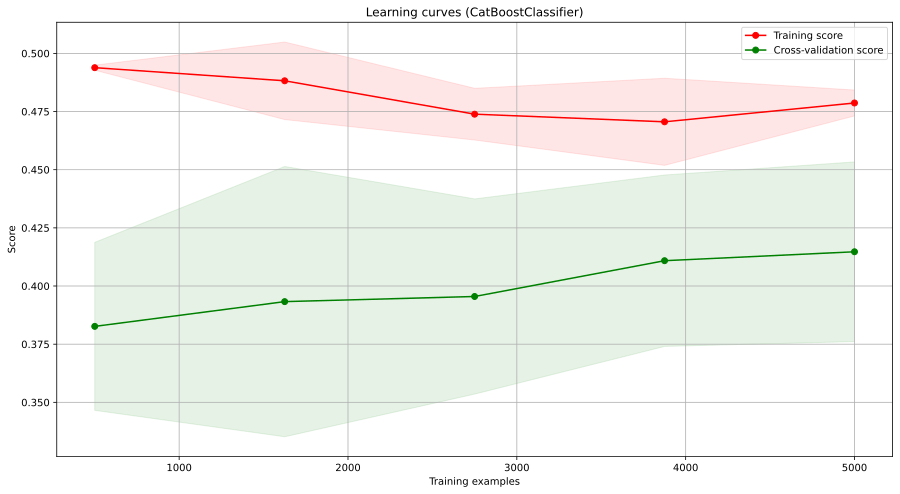

In [64]:
show_learning_curve_plot(final_model, X, y)

#### Выбор порога вероятности для определения класса

In [66]:
y_test_pred_probs = final_model.predict_proba(X_test)

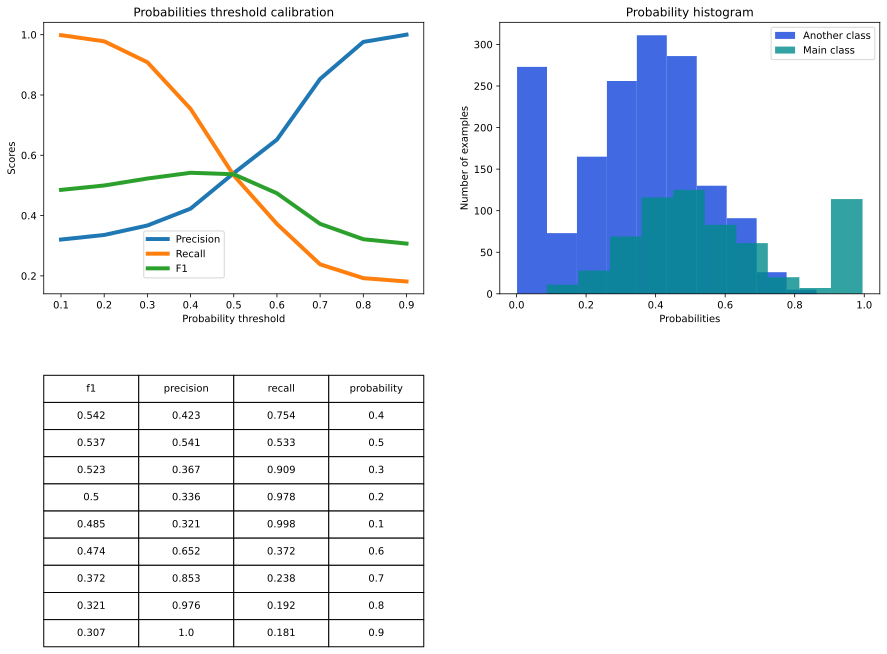

In [67]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

#### Важность признаков

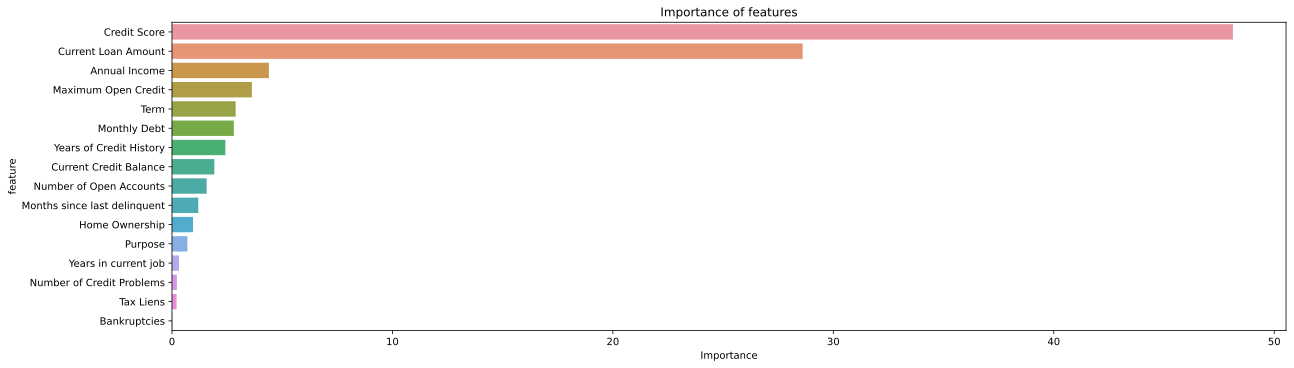

In [68]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=15)

## Прогнозирование

In [88]:
df_test_sort_column = df_test[SELECTED_FEATURE_NAMES]
y_pred = final_model.predict(df_test_sort_column)
df_preds = pd.DataFrame()
df_preds['Id'] = df_test.index
df_preds['Price'] = y_pred
df_preds.head()

,Id,Price
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


In [90]:
df_preds['Price'].value_counts()

0    1828
1     672
Name: Price, dtype: int64

In [92]:
df_preds.to_csv('ASolomennik_predictions.csv', index=False)